<a href="https://colab.research.google.com/github/Shirohige7/aggricultureCNN/blob/main/agricultureCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import PIL
import warnings
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from PIL import Image
import matplotlib.pyplot as plt
import os
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive #mounting Google drive where i have my kaggle dataset
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#setting the matplotlib backend , random seed and seaborn style
%matplotlib inline
np.random.seed(0)
sns.set(style='white', context='notebook', palette='deep')

In [4]:
#getting our dataframes from the csv's
train=pd.read_csv('/content/drive/MyDrive/kaggle/input/agriculture-crop-images/Crop_details.csv') #reading the train dataframe
test=pd.read_csv('/content/drive/MyDrive/kaggle/input/testssss/testdata.csv') #reading the test dataframe
#they are stored in pandas arrays

4    203
3    199
0    199
1    199
2    199
Name: croplabel, dtype: int64

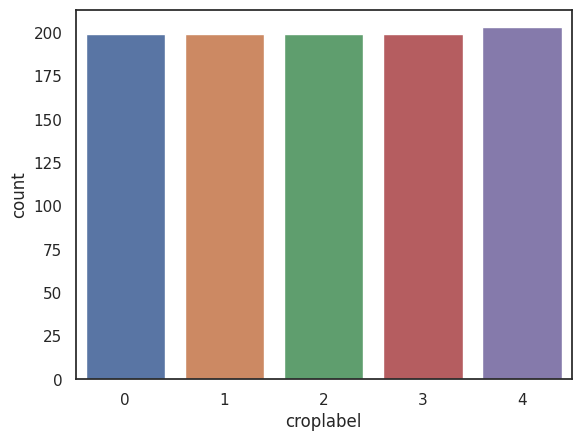

In [5]:
Y_train=train['croplabel'] #setting our target labels
X_train=train.drop(labels=['croplabel'],axis=1) #setting our input features
g=sns.countplot(x=Y_train) #visualizing the distribution of target labels
Y_train.value_counts()

In [6]:
#checking if there is a null entry
(X_train=='NaN').any()
(Y_train=='NaN').any()

False

In [7]:
#dropping the non needed columns
X_train=X_train.drop(columns=['crop'],axis=0)
X_train=X_train.drop(columns=['Unnamed: 0'],axis=0)



```
Image.open(X_train['path'][0])
```


Using the above code we find that we get an error because it can't find the location of the image based on the csv kaggle path
so in the below functions:
<ul>
  <li>  we replace the path-testpath of our dataframe to match the destination of the images in our drive
  <li>  we now load and preprocess the images by resizing them
  <li> we convert them in numpy arrays
  <li>we reshape them to have 3 dimensions (width,height and RGB channel)
</ul>

In [8]:
test['testpath'][:7] #form of the dataframe path to load the images

0    /kaggle/input/testssss/test_crop_image/wheat-f...
1    /kaggle/input/testssss/test_crop_image/jute-fi...
2    /kaggle/input/testssss/test_crop_image/wheat-c...
3    /kaggle/input/testssss/test_crop_image/maize00...
4    /kaggle/input/testssss/test_crop_image/rice-fi...
5    /kaggle/input/testssss/test_crop_image/rice812...
6    /kaggle/input/testssss/test_crop_image/rice-51...
Name: testpath, dtype: object

In [9]:
def path_to_RGB(path :str):
   path=path.replace('/kaggle/input','/content/drive/MyDrive/kaggle/input/agriculture-crop-images')
   img = Image.open(path)
   img = img.resize((28, 28))
   img_arr = np.array(img)
   img_arr = img_arr.reshape(28,28,3)
   return img_arr

def path_to_RGB_test(path :str):
   path=path.replace('/kaggle/input','/content/drive/MyDrive/kaggle/input')
   img = Image.open(path)
   img = img.resize((28, 28))
   img_arr = np.array(img)
   img_arr = img_arr.reshape(28,28,3)
   return img_arr

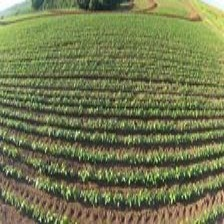

In [10]:
Image.open('/content/drive/MyDrive/kaggle/input/agriculture-crop-images/kag2/sugarcane/sugarcane037ahs.jpeg')
#the correct path to open and preprocess our images

In [11]:
X_train['path']=X_train['path'].apply(path_to_RGB)
test['testpath']=test['testpath'].apply(path_to_RGB_test)
X_train['path']=X_train['path']/255
test['testpath']=test['testpath']/255

In [12]:
test['testpath'][:7] #new form of our testpath after the path_to_RGB_test func

0    [[[0.996078431372549, 0.8705882352941177, 0.58...
1    [[[0.5725490196078431, 0.5882352941176471, 0.9...
2    [[[0.8156862745098039, 0.6666666666666666, 0.3...
3    [[[0.7176470588235294, 0.8509803921568627, 0.5...
4    [[[0.2549019607843137, 0.4627450980392157, 0.7...
5    [[[0.37254901960784315, 0.7294117647058823, 0....
6    [[[0.5725490196078431, 0.6313725490196078, 0.0...
Name: testpath, dtype: object

In [13]:
X_train['path'].shape #shape is the dimensions of the arrays so our array has 999 rows

(999,)

In [14]:
test['testpath'].shape

(51,)

In [15]:
X=[] #flattening the image data in to one single array
for x in X_train['path']:
    for j in x:
        for i in j:
            for a in i :
                X.append(a)

In [16]:
X_train['path'][0][0][0]

array([0.97647059, 0.99215686, 0.99215686])

In [17]:
X[:3]

[0.9764705882352941, 0.9921568627450981, 0.9921568627450981]

In [18]:
Y_train[0] #Y_train integer label

3

In [19]:
#resized and one hot encoding of the labels
X=np.asarray(X).reshape(999,28,28,3) #reshaping X for 999 images 28X28 width-height and 3 color channels RGB
Y=Y_train
Y=to_categorical(Y,num_classes=5) #to_categorical each class label (which is an integer) is represented as a binary vector.

In [20]:
Y[0] #Y binary vector

array([0., 0., 0., 1., 0.], dtype=float32)

In [21]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(5, activation = "softmax"))

In [22]:
from tensorflow.keras.optimizers import Adam
# Define the Adam optimizer with your desired learning rate (lr)
optimizer = Adam(learning_rate=0.001)

# Compile the model with the new optimizer
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [23]:
r = model.fit(X,Y,epochs=30)

Epoch 1/30
32/32 [==============================] - 15s 405ms/step - loss: 1.6093 - accuracy: 0.2442
Epoch 2/30
32/32 [==============================] - 9s 268ms/step - loss: 1.5367 - accuracy: 0.3113
Epoch 3/30
32/32 [==============================] - 12s 386ms/step - loss: 1.4239 - accuracy: 0.3854
Epoch 4/30
32/32 [==============================] - 10s 312ms/step - loss: 1.3142 - accuracy: 0.4675
Epoch 5/30
32/32 [==============================] - 11s 345ms/step - loss: 1.2128 - accuracy: 0.5085
Epoch 6/30
32/32 [==============================] - 11s 345ms/step - loss: 1.1605 - accuracy: 0.5405
Epoch 7/30
32/32 [==============================] - 10s 312ms/step - loss: 1.0616 - accuracy: 0.5956
Epoch 8/30
32/32 [==============================] - 12s 382ms/step - loss: 0.9623 - accuracy: 0.6256
Epoch 9/30
32/32 [==============================] - 9s 270ms/step - loss: 0.9143 - accuracy: 0.6356
Epoch 10/30
32/32 [==============================] - 13s 403ms/step - loss: 0.7676 - accuracy

In [24]:
X_test=test['testpath']
Y_test=test['croplabel']

In [25]:
X_t=[]
for x in X_test:
    for j in x:
        for i in j:
            for a in i :
                X_t.append(a)

In [26]:
X_t=np.asarray(X_t).reshape(51,28,28,3)

In [27]:
Y_test=to_categorical(Y_test,num_classes=5)

In [28]:
model.evaluate(X_t,Y_test)

2/2 [==============================] - 0s 66ms/step - loss: 3.8083 - accuracy: 0.5294


[3.8082730770111084, 0.529411792755127]

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

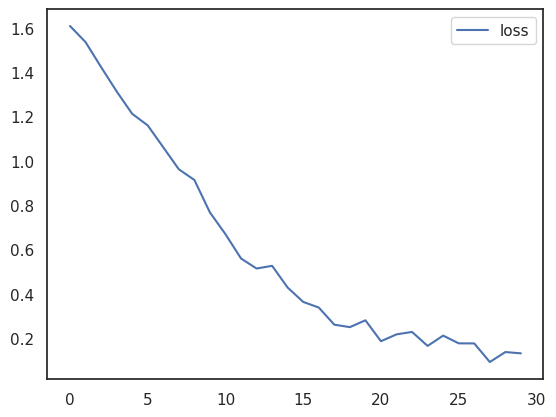

In [32]:
plt.plot(r.history['loss'], label='loss')
plt.legend()

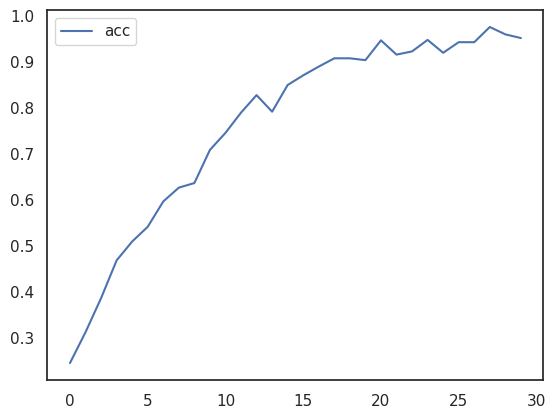

In [33]:
plt.plot(r.history['accuracy'], label='acc')
plt.legend()

In [34]:
P = model.predict(X_t)

2/2 [==============================] - 0s 38ms/step


In [35]:
round = np.argmax(P, axis=1)
print(round.flatten())

[4 0 4 0 2 0 2 2 4 4 1 4 4 1 0 3 1 4 3 3 3 0 1 3 3 3 4 1 2 0 0 4 1 1 2 2 1
 3 3 4 0 3 3 1 2 4 2 3 3 4 2]


In [36]:
Y_test[1]
rounded_labels=np.argmax(Y_test, axis=1)
print(rounded_labels.flatten())

[4 0 4 1 2 2 2 1 4 4 1 4 4 4 0 1 3 4 3 0 1 0 3 3 1 3 4 1 1 2 1 4 3 0 1 4 1
 0 3 4 0 2 3 4 0 4 0 2 2 4 2]


2/2 [==============================] - 0s 39ms/step
confusion matrix, without normalization
[[ 4  1  2  2  0]
 [ 2  3  3  3  0]
 [ 2  0  3  3  0]
 [ 0  3  0  5  0]
 [ 0  2  1  0 12]]


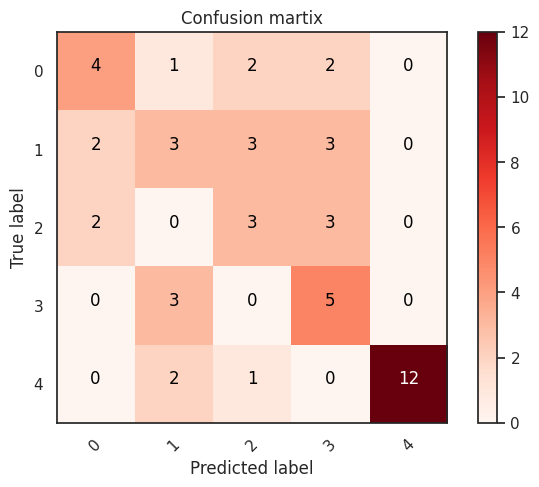

In [37]:
# confusion matrix that outpouts the true label and the predicted label
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion martix',
                          cmap=plt.cm.Reds):
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('confusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j], fmt),
             horizontalalignment='center',
             color='white' if cm[i,j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
p_test = model.predict(X_t).argmax(axis=1)
cm = confusion_matrix(rounded_labels, p_test)
plot_confusion_matrix(cm, list(range(5)))

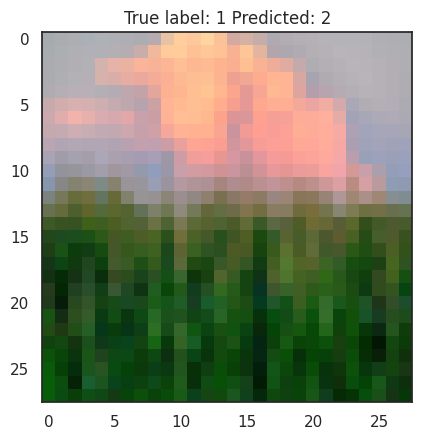

In [39]:
misclassified_idx = np.where(p_test != rounded_labels)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_t[i])
plt.title('True label: %s Predicted: %s' % (rounded_labels[i], p_test[i]));

In [40]:
model.save('agrocrops_CNN.h5')

In [41]:
!ls -lh

total 11M
-rw-r--r-- 1 root root  11M Oct 24 07:48 agrocrops_CNN.h5
drwx------ 5 root root 4.0K Oct 24 07:00 drive
drwxr-xr-x 1 root root 4.0K Oct 20 13:20 sample_data
